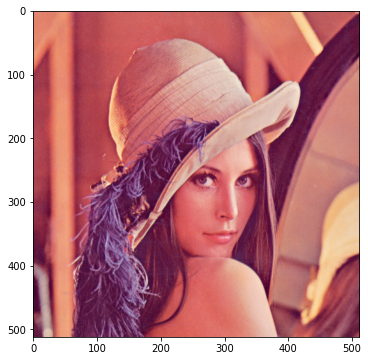

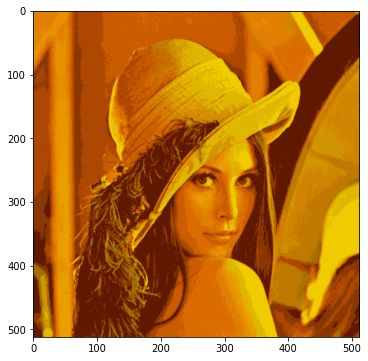

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def read_image_from_computer():
    image = Image.open('lena.png')
    plt.figure(figsize=(12,6))
    plt.imshow(image)
    image = np.asarray(image)/255.0
    return image
  
def initialize_means(image, clusters):     
    points = np.reshape(image, (image.shape[0] * image.shape[1],
                                            image.shape[2])) 
    m, n = points.shape
    means = np.zeros((clusters, n))   
    for i in range(clusters):
        rand1 = int(np.random.random(1)*10)
        rand2 = int(np.random.random(1)*8)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]
    return points, means
  
  
def distance_calculate(x1, y1, x2, y2):     
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)  
    return dist
  
  
def k_means_algorithmn(points, means, clusters):
    iterations = 10 
    m, n = points.shape
    index = np.zeros(m) 
    while(iterations > 0):
        for j in range(len(points)):             
            minv = 1000
            temp = None             
            for k in range(clusters):               
                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = means[k, 0]
                y2 = means[k, 1]                 
                if(distance_calculate(x1, y1, x2, y2) < minv):         
                    minv = distance_calculate(x1, y1, x2, y2)
                    temp = k
                    index[j] = k           
        for k in range(clusters):             
            sumx = 0
            sumy = 0
            count = 0           
            for j in range(len(points)):                 
                if(index[j] == k):
                    sumx += points[j, 0]
                    sumy += points[j, 1] 
                    count += 1             
            if(count == 0):
                count = 1               
            means[k, 0] = float(sumx / count)
            means[k, 1] = float(sumy / count)              
        iterations -= 1
    return means, index
  
  
def image_compression(means, index, image):
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]    
    recovered = np.reshape(recovered, (image.shape[0], image.shape[1],
                                                     image.shape[2]))

    plt.figure(figsize=(12,6))
    plt.imshow(recovered)
  
  
if __name__ == '__main__':
  
    image = read_image_from_computer()
    clusters = 16
    points, means = initialize_means(image, clusters)
    means, index = k_means_algorithmn(points, means, clusters)
    image_compression(means, index, image)